# Project 2: Ames Housing Data and Kaggle Challenge
---
### Group : Happy Three Friends.
### Member : 
1. Supadit Wanotayapitak (Mink)
2. Kant Charoensedtasin (Gun)
3. Warintorn Nawong (Tonzai)


## Problem statement

1. Invent model to evaluate proper price of the property according to appointed features.
2. Matching property features and clients.

## Background

1. We are seeking new opportunity in Ames, Iowa ( aka Happy Trees Town)
2. Studying dataset for property investment to match client’s need
    - Low price-sale
    - Average price-sale
    - High price-sale

### Content
1. [Data import](#1.-Data-import)
2. [Data cleaning](#2.-Data-cleaning) : Cleaning data ([Data dictionary]())
3. [Exploration data analysis](#3.-Exploration-data-analysis)
4. [Feature engineering](#4.-Feature-engineering)
5. [Training model](#5.-Training-model)
6. [Model result](#6.-Model-result)
7. [Conclusion and recommendation](#7.-Conclusion-and-recommendation)

## 1. Data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV

In [2]:
df = pd.read_csv('train.csv')

In [3]:
# Replace ' ' with '_' and lowercase column name
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
df.head()

,order,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


In [5]:
df.info()
# Total column = 82 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order            2197 non-null   int64  
 1   pid              2197 non-null   int64  
 2   ms_subclass      2197 non-null   int64  
 3   ms_zoning        2197 non-null   object 
 4   lot_frontage     1835 non-null   float64
 5   lot_area         2197 non-null   int64  
 6   street           2197 non-null   object 
 7   alley            143 non-null    object 
 8   lot_shape        2197 non-null   object 
 9   land_contour     2197 non-null   object 
 10  utilities        2197 non-null   object 
 11  lot_config       2197 non-null   object 
 12  land_slope       2197 non-null   object 
 13  neighborhood     2197 non-null   object 
 14  condition_1      2197 non-null   object 
 15  condition_2      2197 non-null   object 
 16  bldg_type        2197 non-null   object 
 17  house_style   

Total column : 82 columns
- Object 43 columns
- Numerical data 39 columns

## 2. Data cleaning

In [6]:
#Copy dataframe
df_clean = df.copy()

# Check size of dataframe
num_row_before_clean = df_clean.shape[0]
num_col_before_clean = df_clean.shape[1]
print(f'Dataframe before clean has {num_row_before_clean} rows and {num_col_before_clean} columns.')

Dataframe before clean has 2197 rows and 82 columns.


In [7]:
# Drop unique key column
df_clean = df_clean.drop(columns = ['order','pid'])

In [8]:
# Check and sort missing value
df_clean.isna().sum()[df_clean.isna().sum() > 0].sort_values(ascending = False)

pool_qc           2185
misc_feature      2117
alley             2054
fence             1778
fireplace_qu      1066
lot_frontage       362
garage_cond        122
garage_qual        122
garage_finish      122
garage_yr_blt      122
garage_type        120
bsmt_exposure       69
bsmtfin_type_2      68
bsmtfin_type_1      67
bsmt_qual           67
bsmt_cond           67
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       1
bsmt_full_bath       1
total_bsmt_sf        1
bsmt_unf_sf          1
garage_cars          1
garage_area          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
electrical           1
dtype: int64

There are some of missing data is NMAR type. (From data_description.txt file) The meaning of missing value in each columns is in table below.


In [9]:
%%html
<style>
table {float:left}
</style>

**Note** - Code above is adjust the position of markdown table

|Columns|Desciption|
|:------|:---------|
|pool_qc           | No pool
|misc_feature      | None misc feature
|alley             | No alley access
|fence             | No fence
|fireplace_qu      | No fireplace
|garage_yr_blt     | No Garage 
|garage_qual       | No Garage 
|garage_cond       | No Garage 
|garage_finish     | No Garage 
|garage_type       | No Garage 
| bsmt_exposure    | No basement
| bsmtfin_type_2   | No basement
| bsmtfin_type_1   | No basement
| bsmt_cond        | No basement
|bsmt_qual         | No basement
| mas_vnr_area     | Maybe actually missing
| mas_vnr_type     | Maybe actually missing
| bsmtfin_sf_2     | No basement

### Handing missing value
We divide handling the missing value into 3 group.
1. Large amount of missing value: Drop columns because it may decrease accuracy of the model.

In [10]:
# Drop column with Large amount of missing value
df_clean = df_clean.drop(columns = ['pool_qc','misc_feature','alley','fence'\
                                    ,'fireplace_qu'])

2. Not too large or NMAR type missing value: Impute appropiate value into the column.

**Note** - Some column has text `'No'` represent absense of the value e.g. garage and basement column.

In [11]:
# Impute missing value in lot_frontage columns with mean
df_clean['lot_frontage'] = df_clean['lot_frontage']\
.fillna(df_clean['lot_frontage'].mean())

In [12]:
# Impute garage missing value (Not Missing at Random)
# 'No' represent no garage then we impute the 'No' into missing value
garage_missing = ['garage_cond','garage_qual','garage_finish'\
                  ,'garage_yr_blt','garage_type']
for garage_col in garage_missing:
    if df_clean[garage_col].dtypes == 'O' :
        df_clean[garage_col] = df_clean[garage_col].fillna('No')
    else :
        df_clean[garage_col] = df_clean[garage_col].fillna(0)

In [13]:
# Impute basement missing value (Not Missing at Random)
# 'No' represent no basement then we impute the 'No' into missing value
bsmt_missing = ['bsmt_exposure','bsmtfin_type_2','bsmt_qual','bsmt_cond',\
                'bsmtfin_type_1']
for col in bsmt_missing:
    df_clean[col] = df_clean[col].fillna('No')

In [14]:
# Impute missing value in mas_vnr_area and mas_vnr_type column with mode
mode_mas_area = df_clean['mas_vnr_area'].mode()[0]
mode_mas_type = df_clean['mas_vnr_type'].mode()[0]
df_clean['mas_vnr_area'] = df_clean['mas_vnr_area'].fillna(mode_mas_area)
df_clean['mas_vnr_type'] = df_clean['mas_vnr_type'].fillna(mode_mas_type)

3. Small amount of missing value: Impute appropiate value into the column.

In [15]:
# List of remain column contain missing value
column_na = list(df_clean.isna().sum()[df_clean.isna().sum() > 0].index)

In [16]:
# Impute all remaining missing value
for col in column_na:
    if df_clean[col].dtypes == 'O' :
        df_clean[col] = df_clean[col].fillna('No')
    else :
        df_clean[col] = df_clean[col].fillna(0)

In [17]:
# Check the dataframe after handing missing value
print(f'Dataframe before clean has {num_row_before_clean} rows and {num_col_before_clean} columns.')
print(f'Dataframe after clean has {df_clean.shape[0]} rows and {df_clean.shape[1]} columns.')
df_clean.isna().sum()[df_clean.isna().sum() > 0]

Dataframe before clean has 2197 rows and 82 columns.
Dataframe after clean has 2197 rows and 75 columns.


Series([], dtype: int64)

### Data dictionary
Data dictionary for ames dataset. This dataset contain 82 column with 39 numeric columns and 43 object columns.

|Feature         |Type   |Description|
|:---------------|:-----:|:-------------------------------------|
|id              |int64  |Unique id|
|ms_subclass     |int64  |The building class|
|ms_zoning       |int64  |The general zoning classification|
|lot_frontage    |object |Linear feet of street connected to property|
|lot_area        |float64|Lot size in square feet|
|street          |int64  |Type of road access
|alley           |object |Type of alley access
|lot_shape       |object |General shape of property
|land_contour    |object |Flatness of the property
|utilities       |object |Type of utilities available
|lot_config      |object |Lot configuration
|land_slope      |object |Slope of property
|neighborhood    |object |Physical locations within Ames city limits
|condition_1     |object |Proximity to main road or railroad
|condition_2     |object |Proximity to main road or railroad (if a second is present)|
|bldg_type       |object |Type of dwelling
|house_style     |object |Style of dwelling
|overall_qual    |int64  |Overall material and finish quality
|overall_cond    |int64  |Overall condition rating
|year_built      |int64  |Original construction date
|year_remod/add  |int64  |Remodel date
|roof_style      |object |Type of roof
|roof_matl       |object |Roof material
|exterior_1st    |object |Exterior covering on house
|exterior_2nd    |object |Exterior covering on house (if more than one material)|
|mas_vnr_type    |object |Masonry veneer type
|mas_vnr_area    |float64|Masonry veneer area in square feet
|exter_qual      |object |Exterior material quality
|exter_cond      |object |Present condition of the material on the exterior|
|foundation      |object |Type of foundation
|bsmt_qual       |object |Height of the basement
|bsmt_cond       |object |General condition of the basement
|bsmt_exposure   |object |Walkout or garden level basement walls
|bsmtfin_type_1  |object |Quality of basement finished area
|bsmtfin_sf_1    |float64|Type 1 finished square feet
|bsmtfin_type_2  |object |Quality of second finished area (if present)
|bsmtfin_sf_2    |float64|Type 2 finished square feet
|bsmt_unf_sf     |float64|Unfinished square feet of basement area
|total_bsmt_sf   |float64|Total square feet of basement area
|heating         |object |Type of heating
|heating_qc      |object |Heating quality and condition
|central_air     |object |Central air conditioning
|electrical      |object |Electrical system
|1st_flr_sf      |int64  |First Floor square feet
|2nd_flr_sf      |int64  |Second floor square feet
|low_qual_fin_sf |int64  |Low quality finished square feet (all floors)
|gr_liv_area     |int64  |Above grade (ground) living area square feet
|bsmt_full_bath  |float64|Basement full bathrooms
|bsmt_half_bath  |float64|Basement half bathrooms
|full_bath       |int64  |Full bathrooms above grade
|half_bath       |int64  |Half baths above grade
|bedroom_abvgr   |int64  |Number of bedrooms above basement level
|kitchen_abvgr   |int64  |Number of kitchens
|kitchen_qual    |object |Kitchen quality
|totrms_abvgrd   |int64  |Total rooms above grade (does not include bathrooms)|
|functional      |object |Home functionality rating
|fireplaces      |int64  |Number of fireplaces
|fireplace_qu    |object |Fireplace quality
|garage_type     |object |Garage location
|garage_yr_blt   |float64|Year garage was built
|garage_finish   |object |Interior finish of the garage
|garage_cars     |float64|Size of garage in car capacity
|garage_area     |float64|Size of garage in square feet
|garage_qual     |object |Garage quality
|garage_cond     |object |Garage condition
|paved_drive     |object |Paved driveway
|wood_deck_sf    |int64  |Wood deck area in square feet
|open_porch_sf   |int64  |Open porch area in square feet
|enclosed_porch  |int64  |Enclosed porch area in square feet
|3ssn_porch      |int64  |Three season porch area in square feet
|screen_porch    |int64  |Screen porch area in square feet
|pool_area       |int64  |Pool area in square feet
|pool_qc         |object |Pool quality
|fence           |object |Fence quality
|misc_feature    |object |Miscellaneous feature not covered in other categories|
|misc_val        |int64  |$Value of miscellaneous feature
|mo_sold         |int64  |Month Sold
|yr_sold         |int64  |Year Sold
|sale_type       |object |Type of sale
|sale_condition  |object |Condition of sale
|saleprice       |int64  |the property's sale price in dollars. This is the target variable that you're trying to predict.|


## 3. Exploration data analysis
In this section, we explore data by using correlation and prepare data for training linear regression model.

In [18]:
# Check top 10 correlation with saleprice
df_clean.corr()['saleprice'].sort_values(ascending = False).head(11)

saleprice         1.000000
overall_qual      0.799928
gr_liv_area       0.699675
garage_cars       0.643682
garage_area       0.637089
total_bsmt_sf     0.629605
1st_flr_sf        0.619164
year_built        0.559975
full_bath         0.547815
year_remod/add    0.531341
mas_vnr_area      0.506901
Name: saleprice, dtype: float64

In [19]:
# copy df_clean for scatterplot for eliminate outlier
# df_clean_2 is used only for visualization
df_clean_2 = df_clean.copy()

In [20]:
# Retrieve top 10 feature that have highest correlation with saleprice  
rank1_10 = list(df_clean.corr()['saleprice'].sort_values(ascending = False).head(11).index)
rank1_10.pop(0) # Remove 'log_saleprice' and 'saleprice'
rank1_10

['overall_qual',
 'gr_liv_area',
 'garage_cars',
 'garage_area',
 'total_bsmt_sf',
 '1st_flr_sf',
 'year_built',
 'full_bath',
 'year_remod/add',
 'mas_vnr_area']

In [21]:
# Manually eliminate outlier
df_clean = df_clean[df_clean['saleprice'] < 700000]
df_clean = df_clean[df_clean['gr_liv_area'] < 4000]
df_clean = df_clean[df_clean['garage_area'] > 0]
df_clean = df_clean[df_clean['total_bsmt_sf'] > 0]

In [22]:
def graph_outlier(i, col):
    """Scatterplot for eliminate outlier
    --------
    Parameter
    i - iterator for filling in the subplot and extract eliminating value
    col - name of columns in dataframe for x value
    """
    graph_before = sns.scatterplot(y = 'saleprice', x = col, data = df_clean_2, ax = axes2[i][0])
    axes2[i][0].axhline(700000,color = 'orange',linestyle = '--')
    axes2[i][0].axvline(elim_outlier_value[i], color = 'crimson', linestyle = '--')
    graph_before.set_title(f'saleprice vs {col} with outlier')
    graph_before.set_ylim(0,800000)
    graph_after = sns.scatterplot(y = 'saleprice', x = col, color = 'dodgerblue',data = df_clean, ax = axes2[i][1])
    graph_after.set_title(f'saleprice vs {col} without outlier')
    graph_after.set_ylim(0,800000)

### Comparison between eliminate and not eliminate outlier
**Compare by using scatterplot**
1. left-handed side graphs are data without eliminate outlier. 
    - Orange line is boundary of saleprice.
    - Red line is boundary of column in x-axis.


2. right-handed side graph are data with eliminate outlier.
    - Outlier are manually eliminated.
    - We decide to eliminate outlier in gr_liv_area, garage_area and total_bsmt_sf columns.

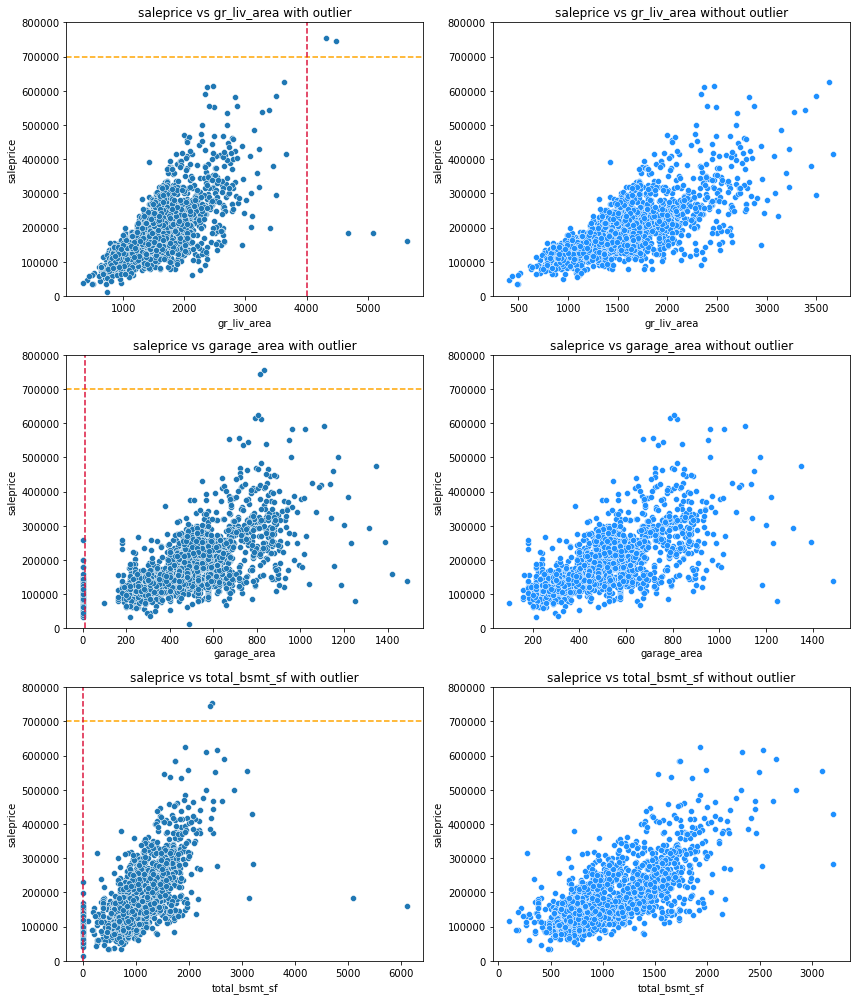

In [23]:
# scatter plot for eliminate outlier corr rank 1 - 10
elim_outlier_col = ['gr_liv_area','garage_area','total_bsmt_sf']
elim_outlier_value = [4000, 10, 10]
fig2, axes2 = plt.subplots(ncols = 2, nrows = len(elim_outlier_col),figsize=(12,14))

for i,col in enumerate(elim_outlier_col):
    graph_outlier(i, col)
plt.tight_layout()

In [24]:
print(f'Dataframe after eliminate outlier has {df_clean.shape[0]} rows and {df_clean.shape[1]} columns.')

Dataframe after eliminate outlier has 2015 rows and 75 columns.


**Note** - For 2 right-handed side point of the graph saleprice vs total_bsmt_sf with outlier, we don't eliminate them because they are gone with above elimination.

After elimination of outlier, The relation between `gr_liv_area` `garage_area` `total_bsmt_sf` and sale price is better.

## 4. Feature engineering
In this project, we have 2 section of feature engineering e.g. log transform column and encoding columns

1. Log tranformation
    - We transform the `saleprice` column by using `np.log()` because the difference between scale of x and y.
    - Expectation: we expect to see more linearity after transforming `saleprice` column

In [25]:
# Copy df_clean after eliminate the outlier
# df_clean_2 is used only for visualization
df_clean_2 = df_clean.copy()

In [26]:
# Take log saleprice for change the scale of saleprice
df_clean_2['log_saleprice'] = np.log(df_clean_2['saleprice'])
df_clean['log_saleprice'] = np.log(df_clean['saleprice'])

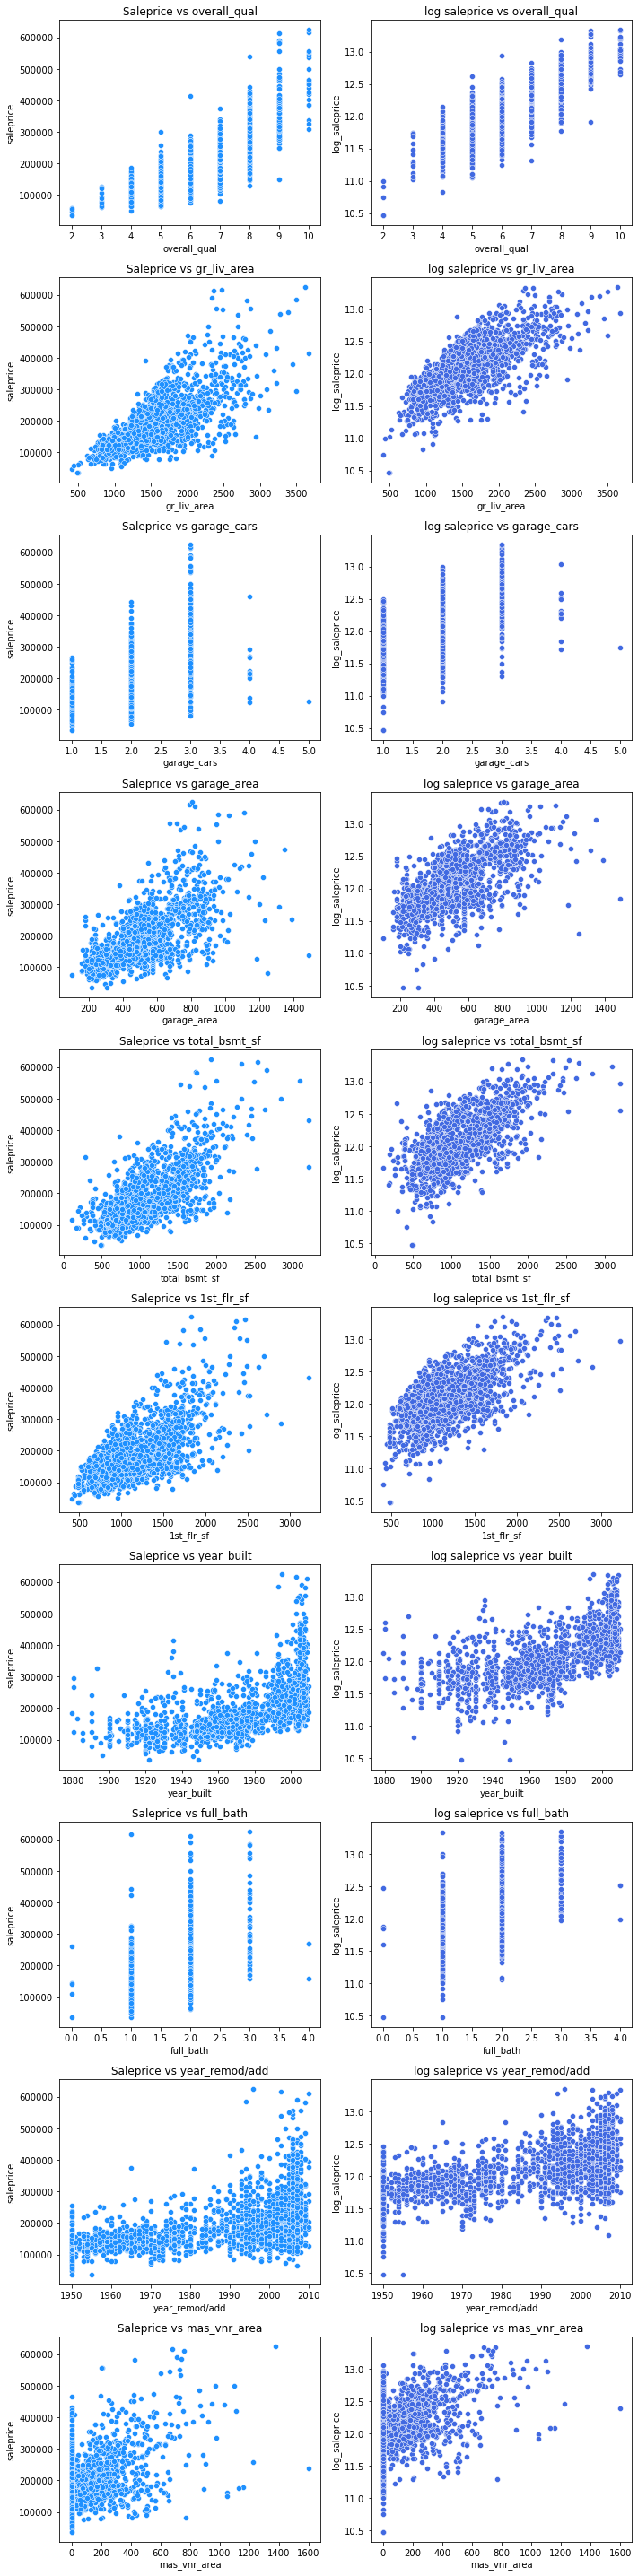

In [27]:
# Compare top 10 correlation feature with saleprice and log_saleprice
fig, axes = plt.subplots(ncols = 2, nrows = 10,figsize=(10,40))
for i, col in enumerate(rank1_10):
    sns.scatterplot(y = 'saleprice', x = col, data = df_clean_2,color = 'dodgerblue', ax = axes[i][0])
    axes[i][0].set(title = f'Saleprice vs {col}')
    sns.scatterplot(y = 'log_saleprice', x = col, data = df_clean_2, ax = axes[i][1],color = 'royalblue',ci = False)
    axes[i][1].set(title = f'log saleprice vs {col}')
plt.tight_layout();

After take log to `saleprice`, `saleprice` scale is smaller and the correlation should be more linear. It may help to improve the linear regression model.

2. One-hot encoding
    - We use only one-hot encoding on few numeric feature. The idea is applied one-hot encoding for numeric feature that is category/ordinal.
    - Reason: Eventhough, the value in `numeric_category_col` is numeric, each value in the column represent the categotical data instead of the number.

In [28]:
numeric_category_col = ['year_remod/add','ms_subclass','mo_sold','overall_qual','overall_cond','yr_sold']
# mo_sold = month sale(MM)
# garage_cars = garage cap in car unit/ garage_area = garage capacity in ft unit
# year_remod/add : Remodel date (same as construction date if no remodeling or additions)

In [29]:
# dummy category numeric column
X = df_clean[df_clean.select_dtypes(exclude = 'object').columns]
for col in numeric_category_col:
        X = pd.get_dummies(data = X, columns = [col],drop_first = True)

## 5. Training model
In this section, we will train the model and check for bias, variance, split reliabilty and model performance.

In [30]:
# Split the X, y for train the model
y = df_clean['log_saleprice'] # Saleprice is log saleprice
X = X.drop(columns = ['saleprice','log_saleprice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [31]:
# Scale the model for using in RidgeCV
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

### Model selection
We don't use the lasso regression because lasso may penalize all of coefficient to zero. Since we require model in the sweet spot, we decide to use ridge regression. 

In [32]:
# RidgeCV
alphas = np.logspace(-3,5,100)
ridge_cv = RidgeCV(alphas = alphas)
ridge_cv.fit(Z_train,y_train)
y_ridge_cv_pred = ridge_cv.predict(Z_train)
y_ridge_cv_pred_test = ridge_cv.predict(Z_test)
print(f'Model result')
print(f'----------------')
print(f'R2_train = {round(ridge_cv.score(Z_train, y_train),4)}')
print(f'R2_test = {round(ridge_cv.score(Z_test, y_test),4)}')
print(f'Cross validation score = {np.round_(cross_val_score(ridge_cv,Z_train,y_train),4)}')
print(f'Optimal alpha = {round(ridge_cv.alpha_,4)}')
print(f'RMSE_train = {round(metrics.mean_squared_error(np.exp(y_train),np.exp(y_ridge_cv_pred),squared= False),0)}')
print(f'RMSE_test = {round(metrics.mean_squared_error(np.exp(y_test), np.exp(y_ridge_cv_pred_test),squared= False),0)}')

Model result
----------------
R2_train = 0.9263
R2_test = 0.919
Cross validation score = [0.8726 0.9226 0.8848 0.9267 0.878 ]
Optimal alpha = 0.3199
RMSE_train = 19489.0
RMSE_test = 20956.0


In [33]:
# Baseline model
df_baseline = pd.DataFrame(np.exp(y_train))
y_baseline_train = np.exp(y_train).mean()
df_baseline['y_baseline_train'] = y_baseline_train
rmse_baseline = round(metrics.mean_squared_error(np.exp(y_train), df_baseline['y_baseline_train'],squared = False),0)
print(f'RMSE baseline train = {rmse_baseline}')

RMSE baseline train = 78438.0


## 6. Model result
After we got the model result, we need to check the performance of the model.
1. Check Bias (underfitting): The model has high $R^{2}$ value. Then the model is not underfitting.
2. check Variance (overfitting): The $R^{2}$ of train set is similar to $R^{2}$ of test set. Then the model is not overfitting.
3. Split reliability: The 5 value of $R^{2}$ from cross validation don't diverge. Then the model performance don't rely on spliting data. 
4. Model performance:
    - $R^{2}$ training set = 0.9263
    - $R^{2}$ test set = 0.919
    - RMSE training set = 19489
    - RMSE test set = 20956

## 7. Conclusion and recommendation
### Conclusion
1. Model RMSE has decreased 37 % which lead to return on property investment increase by 27 %.
2. House Pricing Prediction could personlize based on customer demand in individual house features i.e. number of Garage, Lot Space etc. 
3. Some feature could be selectively stored to optimize between cost of storage and model performance i.e. pool_qc ,misc_feature etc.

### Recommendation
1. To explore more predictively powerful algorithm.
2. To customize key features based on individual city.
3. To expand new opportunities in other cities in the U.S. and the world.